In [1]:
import pandas as pd
import numpy as np
import math


In [6]:
pip install yahoo_fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.5 MB/s 
     |████████████████████████████████| 83 kB 1.7 MB/s 
     |████████████████████████████████| 112 kB 45.2 MB/s 
     |████████████████████████████████| 127 kB 42.3 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=23849015ca2db8ca00bdea0e9f0416f04e0ef128d5e0a9d081410a12b706e41e
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=8e739667424b12aef76077c9880f724e41b177c3258c12042d5a9b19f6de5408
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=06eab0d98e63ea827220ba7aeba600499bc2f847d41817b0dd957

In [2]:
from datetime import date
from matplotlib import pyplot as plt
import datetime as dt
from matplotlib import dates

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
from yahoo_fin.stock_info import get_data

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

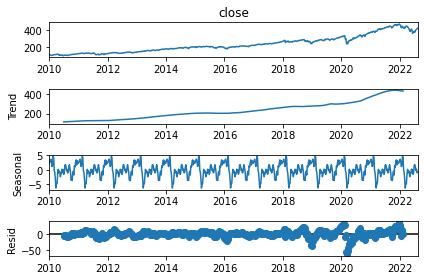

In [26]:
results = seasonal_decompose(FIVE_DF['close'])
results.plot();

In [28]:
FIVE_DF= get_data("FIVE", start_date="01/01/2010", end_date="08/18/2022", index_as_date = True, interval="1wk")
FIVE_DF

,open,high,low,close,adjclose,volume,ticker
2012-07-16,26.049999,29.430000,25.000000,27.270000,27.270000,11429300,FIVE
2012-07-23,27.240000,29.959999,26.770000,29.650000,29.650000,1524400,FIVE
2012-07-30,30.010000,30.719999,28.700001,29.790001,29.790001,1112900,FIVE
2012-08-06,29.950001,33.970001,29.690001,32.709999,32.709999,1573000,FIVE
2012-08-13,32.490002,33.490002,30.559999,31.260000,31.260000,1871500,FIVE
...,...,...,...,...,...,...,...
2022-07-18,120.139999,129.600006,119.540001,124.830002,124.830002,3283500,FIVE
2022-07-25,125.019997,127.620003,113.809998,127.070000,127.070000,4619900,FIVE
2022-08-01,127.000000,142.559998,126.389999,138.559998,138.559998,4745900,FIVE
2022-08-08,140.270004,146.020004,134.029999,140.080002,140.080002,3666500,FIVE


In [30]:
FIVE_DF.index.name = 'Date'

In [31]:
FIVE_DF.isna().sum()

open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64

In [32]:
FIVE_DF.describe()

,open,high,low,close,adjclose,volume
count,527.000000,527.000000,527.000000,527.000000,527.000000,5.270000e+02
mean,83.218843,86.678994,79.746755,83.444270,83.444270,4.730918e+06
std,54.513104,56.605920,52.037767,54.507247,54.507247,3.084973e+06
min,26.049999,28.750000,25.000000,27.270000,27.270000,3.617000e+05
25%,38.379999,39.850000,36.980000,38.414999,38.414999,3.014600e+06
50%,51.029999,53.580002,50.000000,51.150002,51.150002,4.051600e+06
75%,124.364998,128.750000,118.525002,125.099998,125.099998,5.289150e+06
max,227.220001,237.860001,215.710007,225.110001,225.110001,2.658000e+07


In [33]:
FIVE_DF = FIVE_DF.sort_values('Date')

In [34]:
close_prices = FIVE_DF['close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [35]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=4)

Epoch 1/4
362/362 [==============================] - 15s 32ms/step - loss: 0.0051
Epoch 2/4
362/362 [==============================] - 12s 32ms/step - loss: 0.0022
Epoch 3/4
362/362 [==============================] - 12s 32ms/step - loss: 0.0016
Epoch 4/4
362/362 [==============================] - 12s 32ms/step - loss: 0.0016


In [38]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

15.26069074358259

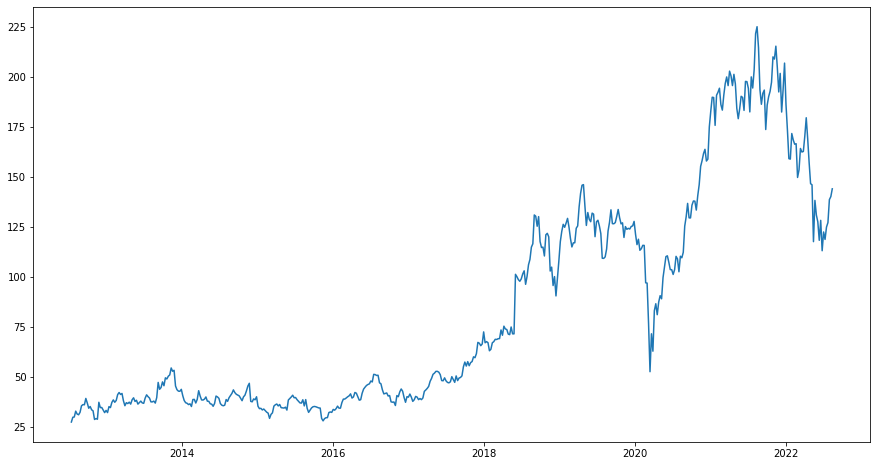

In [39]:
plt.figure(figsize=(15, 8))
plt.plot(FIVE_DF['close'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


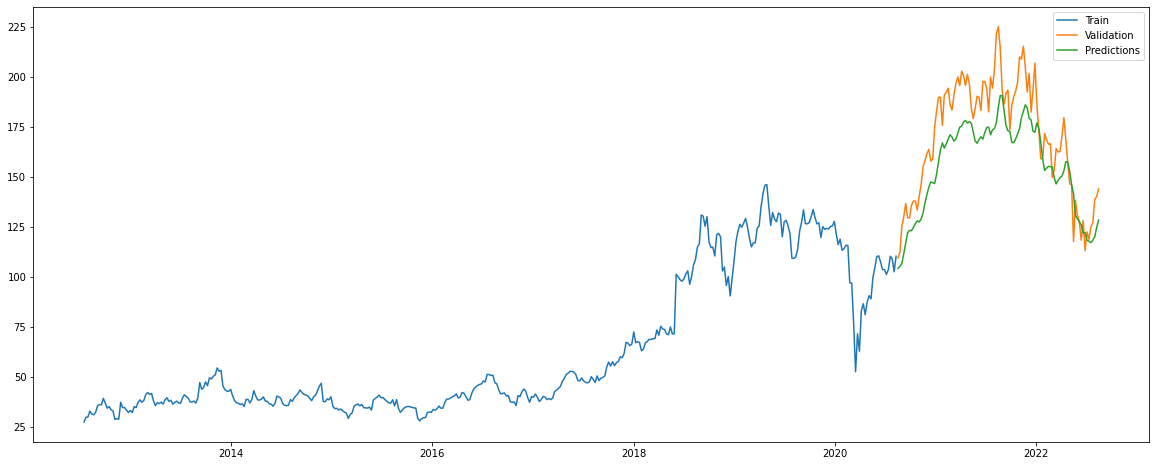

In [40]:
data = FIVE_DF.filter(['close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.plot(train)
plt.plot(validation[['close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'])

plt.show()